In [1]:

from datascience import *
path_data = '../../../../data/'
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

### Simulation ###
Simulation is the process of using a computer to mimic a physical experiment. In this class, those experiments will almost invariably involve chance. 

We have seen how to simulate the results of tosses of a coin. The steps in that simulation were examples of the steps that will constitute every simulation we do in this course. In this section we will set out those steps and follow them in examples.

### Step 1: What to Simulate ###
Specify the quantity you want to simulate. For example, you might decide that you want to simulate the outcomes of tosses of a coin. 

### Step 2: Simulating One Value ###
Figure out how to simulate *one* value of the quantity you specified in Step 1. In our example, you have to figure out how to simulate the outcome of *one* toss of a coin. If your quantity is more complicated, you might need several lines of code to come up with one simulated value.

### Step 3: Number of Repetitions ###
Decide how many times you want to simulate the quantity. You will have to repeat Step 2 that many times. In one of our earlier examples we had decided to simulate the outcomes of 1000 tosses of a coin, and so we needed 1000 repetitions of generating the outcome of a single toss.

### Step 4: Coding the Simulation ###
Put it all together in code.
- Create an empty array in which to collect all the simulated values. We will call this the collection array.
- Create a "repetitions sequence," that is, a sequence whose length is the number of repetitions you specified in Step 3. For `n` repetitions we will almost always use the sequence `np.arange(n)`.
- Create a `for` loop. For each element of the repetitions sequence:
    - Simulate *one* value based on the code you developed in Step 2.
    - Augment the collection array with this simulated value.
    
That's it! Once you have carried out the steps above, your simulation is done. The collection array contains all the simulated values. 

At this point you can use the collection array as you would any other array. You can visualize the distribution of the simulated values, count how many simulated values fall into a particular category, and so on.

### Number of Heads in 100 Tosses ###
It is natural to expect that in 100 tosses of a coin, there will be 50 heads, give or take a few. 

But how many is "a few"? What's the chance of getting exactly 50 heads? Questions like these matter in data science not only because they are about interesting aspects of randomness, but also because they can be used in analyzing experiments where assignments to treatment and control groups are decided by the toss of a coin.

In this example we will simulate the number of heads in 100 tosses of a coin. The histogram of our results will give us some insight into how many heads are likely.

Let's get started on the simulation, following the steps above.

### Step 1: What to Simulate ###
The quantity we are going to simulate is the number of heads in 100 tosses. 

### Step 2: Simulating One Value ###
We have to figure out how to make one set of 100 tosses and count the number of heads. Let's start by creating a coin.

In [2]:
coin = make_array('Heads', 'Tails')

In our earlier example we used `np.random.choice` and a `for` loop to generate multiple tosses. But sets of coin tosses are needed so often in data science that `np.random.choice` simulates them for us if we include a second argument that is the number of times to toss.

Here are the results of 10 tosses.

In [3]:
ten_tosses = np.random.choice(coin, 10)
ten_tosses

array(['Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails'], dtype='<U5')

We can count the number of heads by using `np.count_nonzero` as before:

In [4]:
np.count_nonzero(ten_tosses == 'Heads')

4

Our goal is to simulate the number of heads in 100 tosses, not 10. To do that we can just repeat the same code, replacing 10 by 100.

In [5]:
outcomes = np.random.choice(coin, 100)
num_heads = np.count_nonzero(outcomes == 'Heads')
num_heads

45

### Step 3: Number of Repetitions ###
How many repetitions we want is up to us. The more we use, the more reliable our simulations will be, but the longer it will take to run the code. Python is pretty fast at tossing coins. Let's go for 10,000 repetitions. That means we are going to do the following 10,000 times:
- Toss a coin 100 times and count the number of heads.

That's a lot of tossing! It's good that we have Python to do it for us.

### Step 4: Coding the Simulation ###
We are ready to write the code to execute the entire simulation.

In [6]:
# An empty array to collect the simulated values
heads = make_array()

# Repetitions sequence
num_repetitions = 10000
repetitions_sequence = np.arange(num_repetitions)

# for loop
for i in repetitions_sequence:
    
    # simulate one value
    outcomes = np.random.choice(coin, 100)
    num_heads = np.count_nonzero(outcomes == 'Heads')
    
    # augment the collection array with the simulated value
    heads = np.append(heads, num_heads)  

# That's it! The simulation is done.

Check that the array `heads` contains 10,000 entries, one for each repetition of the experiment.

In [7]:
len(heads)

10000

To get a sense of the variability in the number of heads in 100 tosses, we can collect the results in a table and draw a histogram.

In [8]:
simulation_results = Table().with_column(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Number of Heads', heads
)

In [9]:
simulation_results

Repetition,Number of Heads
1,46
2,54
3,53
4,52
5,58
6,48
7,45
8,44
9,43
10,47


/home/choldgraf/anaconda/envs/textbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


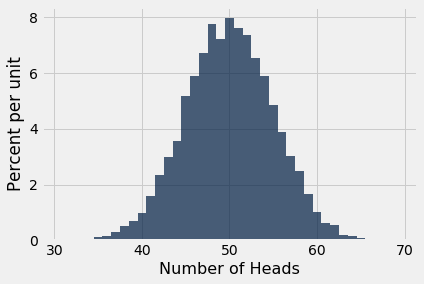

In [10]:
simulation_results.hist('Number of Heads', bins = np.arange(30.5, 69.6, 1))

Each bins has width 1 and is centered at each value of the number of heads.

Not surprisingly, the histogram looks roughly symmetric around 50 heads. The height of the bar at 50 is about 8% per unit. Since each bin is 1 unit wide, this is the same as saying that about 8% of the repetitions produced exactly 50 heads. That's not a huge percent, but it's the largest compared to the percent at every other number of heads.

The histogram also shows that in almost all of the repetitions, the number of heads in 100 tosses was somewhere between 35 and 65. Indeed, the bulk of the repetitions produced numbers of heads in the range 45 to 55. 

While in theory it is *possible* that the number of heads can be anywhere between 0 and 100, the simulation shows that the range of *probable* values is much smaller.

This is an instance of a more general phenomenon about the variability in coin tossing, as we will see later in the course.

### A More Compact Version of the Code ###
We wrote the code for the simulation to show each of the steps in detail. Here are the same steps written in a more compact form. You can see that the code starts out the same way as before, but then some steps are combined.

In [11]:
heads = make_array()

num_repetitions = 10000

for i in np.arange(num_repetitions):
    outcomes = np.random.choice(coin, 100)
    heads = np.append(heads, np.count_nonzero(outcomes == 'Heads'))

In [12]:
heads

array([52., 45., 48., ..., 48., 44., 51.])

### Moves in Monopoly ###
Each move in the game Monopoly is determined by the total number of spots of two rolls of a die. If you play Monopoly, what should you expect to get when you roll the die two times?

We can explore this by simulating the sum of two rolls of a die. We will run the simulation 10,000 times as we did in the previous example. Notice that is this paragraph we have completed Steps 1 and 3 of our simulation process.

Step 2 is the one in which we simulate one pair of rolls and add up the number of spots.

In [13]:
die = np.arange(1, 7)
sum(np.random.choice(die, 2))

8

That simulates one value of the sum of two rolls. We are now all set to run the simulation according to the steps that are now familiar.

In [14]:
moves = make_array()

num_repetitions = 10000

for i in np.arange(num_repetitions):
    one_move = sum(np.random.choice(die, 2))
    moves = np.append(moves, one_move)

Here is a histogram of the results.

/home/choldgraf/anaconda/envs/textbook/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


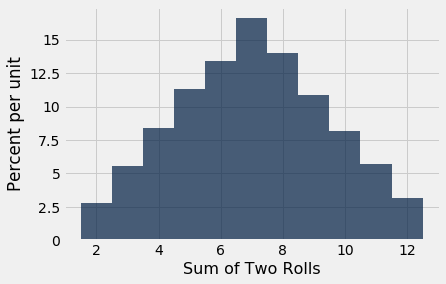

In [15]:
results = Table().with_column(
    'Repetition', np.arange(1, num_repetitions + 1),
    'Sum of Two Rolls', moves
)

results.hist('Sum of Two Rolls', bins = np.arange(1.5, 12.6, 1))

Seven is the most common value, with the frequencies falling off symmetrically on either side.